**Importando arquivo JFF para o Grafo**

Número de Vértices: 17
['Canindé', 'Poço Redondo', 'Porto da Folha', 'Feira Nova', 'Propriá', 'Capela', 'Brejo Grande', 'Aracaju', 'Estância', 'Itabaianinha', 'Lagarto', 'Itabaiana', 'Carira', 'Simão Dias', 'Poço Verde', 'Tobias Barreto', 'Cristinápolis']
Número de Posições x: 17
Número de Posições y: 17
[array([343., 127.]), array([418., 274.]), array([719., 278.]), array([755., 542.]), array([1042.,  425.]), array([1029.,  690.]), array([1377.,  399.]), array([932., 908.]), array([ 727., 1153.]), array([ 385., 1142.]), array([508., 936.]), array([696., 769.]), array([465., 573.]), array([311., 777.]), array([ 55., 786.]), array([ 130., 1050.]), array([ 509., 1340.])]
Número de Transições: 56
[[ 0  1]
 [ 1  3]
 [ 1  0]
 [ 1  2]
 [ 2  1]
 [ 2  4]
 [ 2  3]
 [ 3  1]
 [ 3  5]
 [ 3  4]
 [ 3 11]
 [ 3  2]
 [ 4  3]
 [ 4  2]
 [ 4  6]
 [ 4  5]
 [ 5  6]
 [ 5  3]
 [ 5  7]
 [ 5  4]
 [ 6  5]
 [ 6  4]
 [ 7  5]
 [ 7 11]
 [ 7 10]
 [ 7  8]
 [ 8 16]
 [ 8  7]
 [ 8 10]
 [ 9 10]
 [ 9 15]
 [ 9 16]
 [10 15]


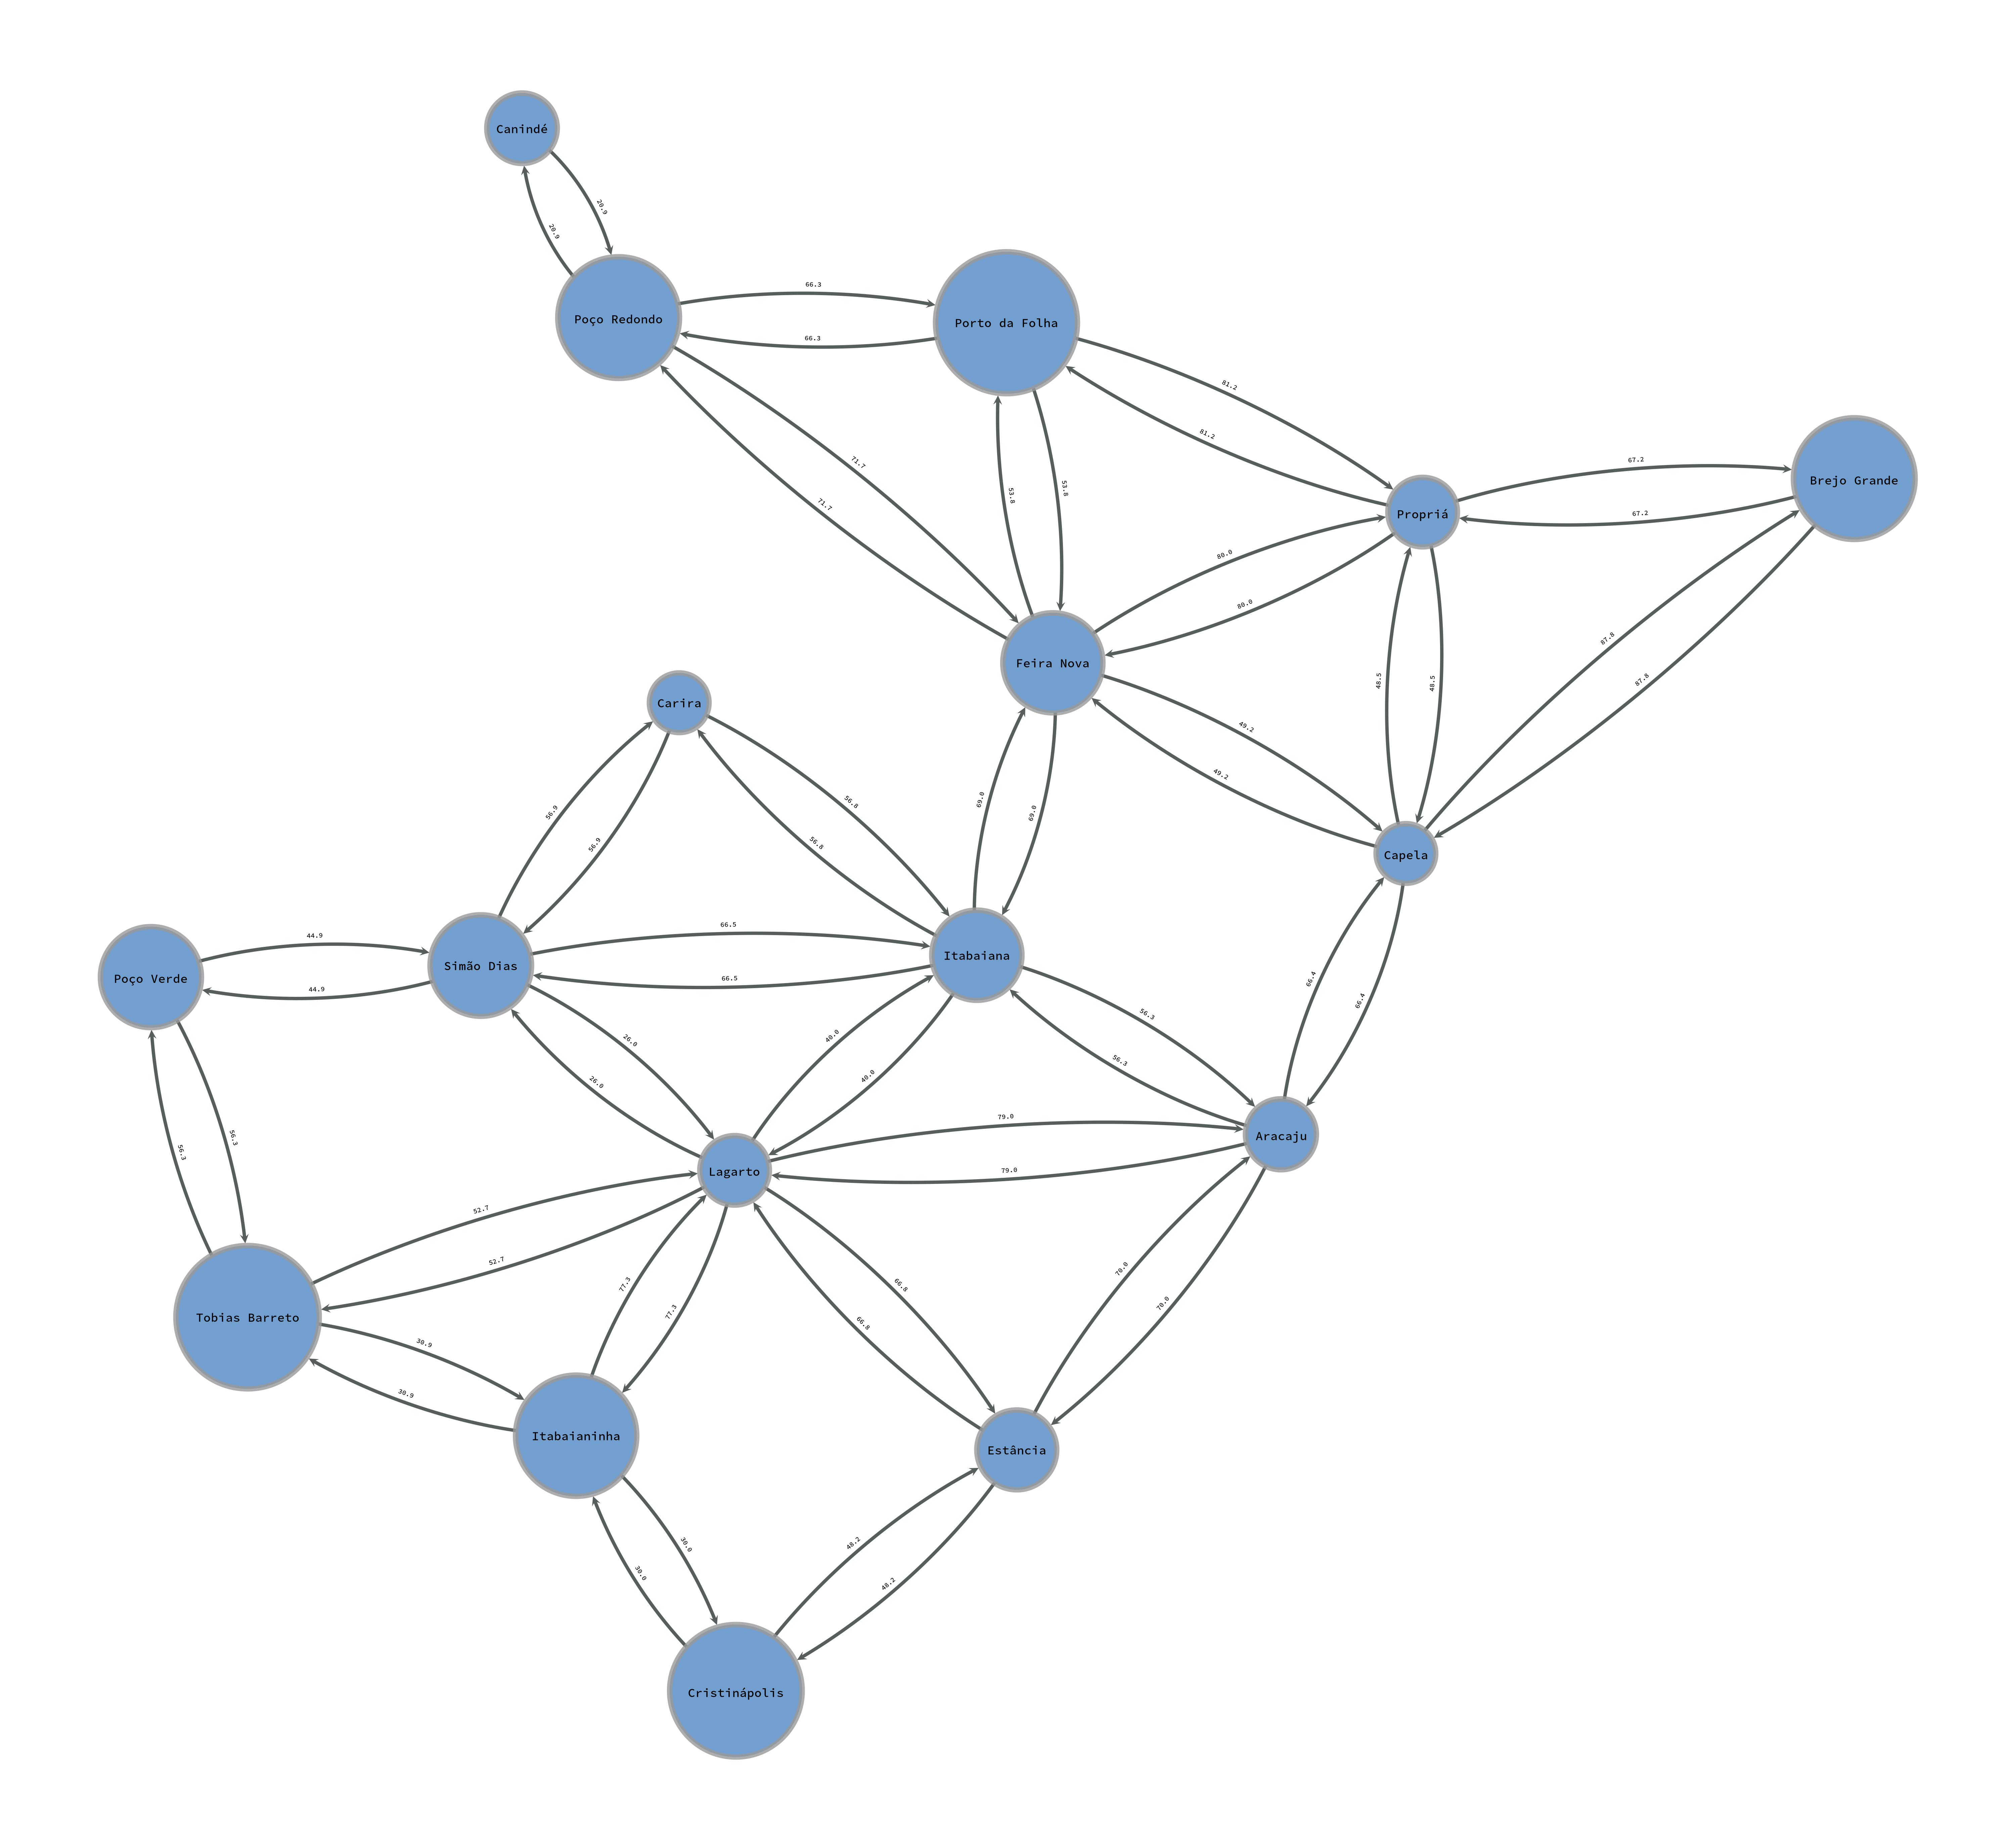

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f912433ff70, at 0x7f90e496e650>

In [1]:
import graph_tool.all as gt                       # Biblioteca para GRAFO 
from xml.dom import minidom

g = gt.Graph() 
g.set_directed(True)                              # criação do objeto
v_name = g.new_vertex_property("string")          # referenciação da lista v_name com uma nova propriedade (label) criada para o vértice - tipo string
e_action = g.new_edge_property("string")          # referenciação da lista e_ord com uma nova propriedade criada para a descrilção da ação relacionada a aresta - tipo string
v_pos  = g.new_vertex_property("vector<double>")

#Criação dos vértices no grafo à partir do arquivo .jff do jFlap
xmldoc = minidom.parse("2022.1 - IA - Grafo.jff")         #Carregando arquivo do JFLAP
itemlist = xmldoc.getElementsByTagName('state')                # Tag <state>  
n_Vertex = len(itemlist)                              
print('Número de Vértices:', len(itemlist))                    # Total de Estados
for s in itemlist:
    v = g.add_vertex()
    v_name[v] = s.attributes['name'].value
# Lista de vértices criados
print(list(v_name))

#Criação da posição dos vértices no grafo à partir do arquivo .jff do jFlap
vposX = []                                                   
itemlist = xmldoc.getElementsByTagName('x')                 # Tag <x>
print('Número de Posições x:', len(itemlist))
for s in itemlist:
   vposX.append(s.childNodes[0].nodeValue)

vposY = []                                                   
itemlist = xmldoc.getElementsByTagName('y')                 # Tag <y>
print('Número de Posições y:', len(itemlist))
for s in itemlist:
   vposY.append(s.childNodes[0].nodeValue)

for v in g.vertices():
    v_pos[v] = (vposX[int(v)],vposY[int(v)])
print(list(v_pos))

#Criação das arestas no grafo à partir do arquivo .jff do jFlap
e_from = []                                                   
itemlist = xmldoc.getElementsByTagName('from')                 # Tag <from>
n_Transition = len(itemlist)
print('Número de Transições:', len(itemlist))
for s in itemlist:
   e_from.append(s.childNodes[0].nodeValue)
e_to = []
itemlist = xmldoc.getElementsByTagName('to')                   # Tag <to>
for s in itemlist:
   e_to.append(s.childNodes[0].nodeValue)
e_read = []
itemlist = xmldoc.getElementsByTagName('read')                 # Tag <read>
for s in itemlist:
   e_read.append(s.childNodes[0].nodeValue)

for edge in range(n_Transition):
     e = g.add_edge(int(e_from[edge]), int(e_to[edge]))
     #e_action[e] = actions[int(e_read[edge])]
     e_action[e] = str(e_read[edge])
# Lista de arestas criadas
print(g.get_edges())

#Desenhando o grafo
gt.graph_draw(g, pos = v_pos,#pos=gt.arf_layout(visual_G),
               bg_color = "white",
               vertex_text= v_name,
               edge_text= e_action,
               edge_pen_width = 5,              
               vertex_font_size=18,
               edge_font_size = 10,
               #vertex_shape="double_circle",
               vertex_fill_color="#729fcf",
               vertex_size = 80,
               output_size=(3000, 3000))
               #output="2022.1 - IA - Grafo.png")

**Busca em Profundidade - Ordem de Expansão dos Nodos**

Número de Vértices: 17
['Canindé', 'Poço Redondo', 'Porto da Folha', 'Feira Nova', 'Propriá', 'Capela', 'Brejo Grande', 'Aracaju', 'Estância', 'Itabaianinha', 'Lagarto', 'Itabaiana', 'Carira', 'Simão Dias', 'Poço Verde', 'Tobias Barreto', 'Cristinápolis']
Propriá -> Feira Nova
Feira Nova -> Poço Redondo
Poço Redondo -> Canindé
Poço Redondo -> Porto da Folha
Feira Nova -> Capela
Capela -> Brejo Grande
Capela -> Aracaju
Aracaju -> Itabaiana
Itabaiana -> Simão Dias
Simão Dias -> Poço Verde
Poço Verde -> Tobias Barreto
Tobias Barreto -> Lagarto
Lagarto -> Itabaianinha
Itabaianinha -> Cristinápolis
Cristinápolis -> Estância
Simão Dias -> Carira


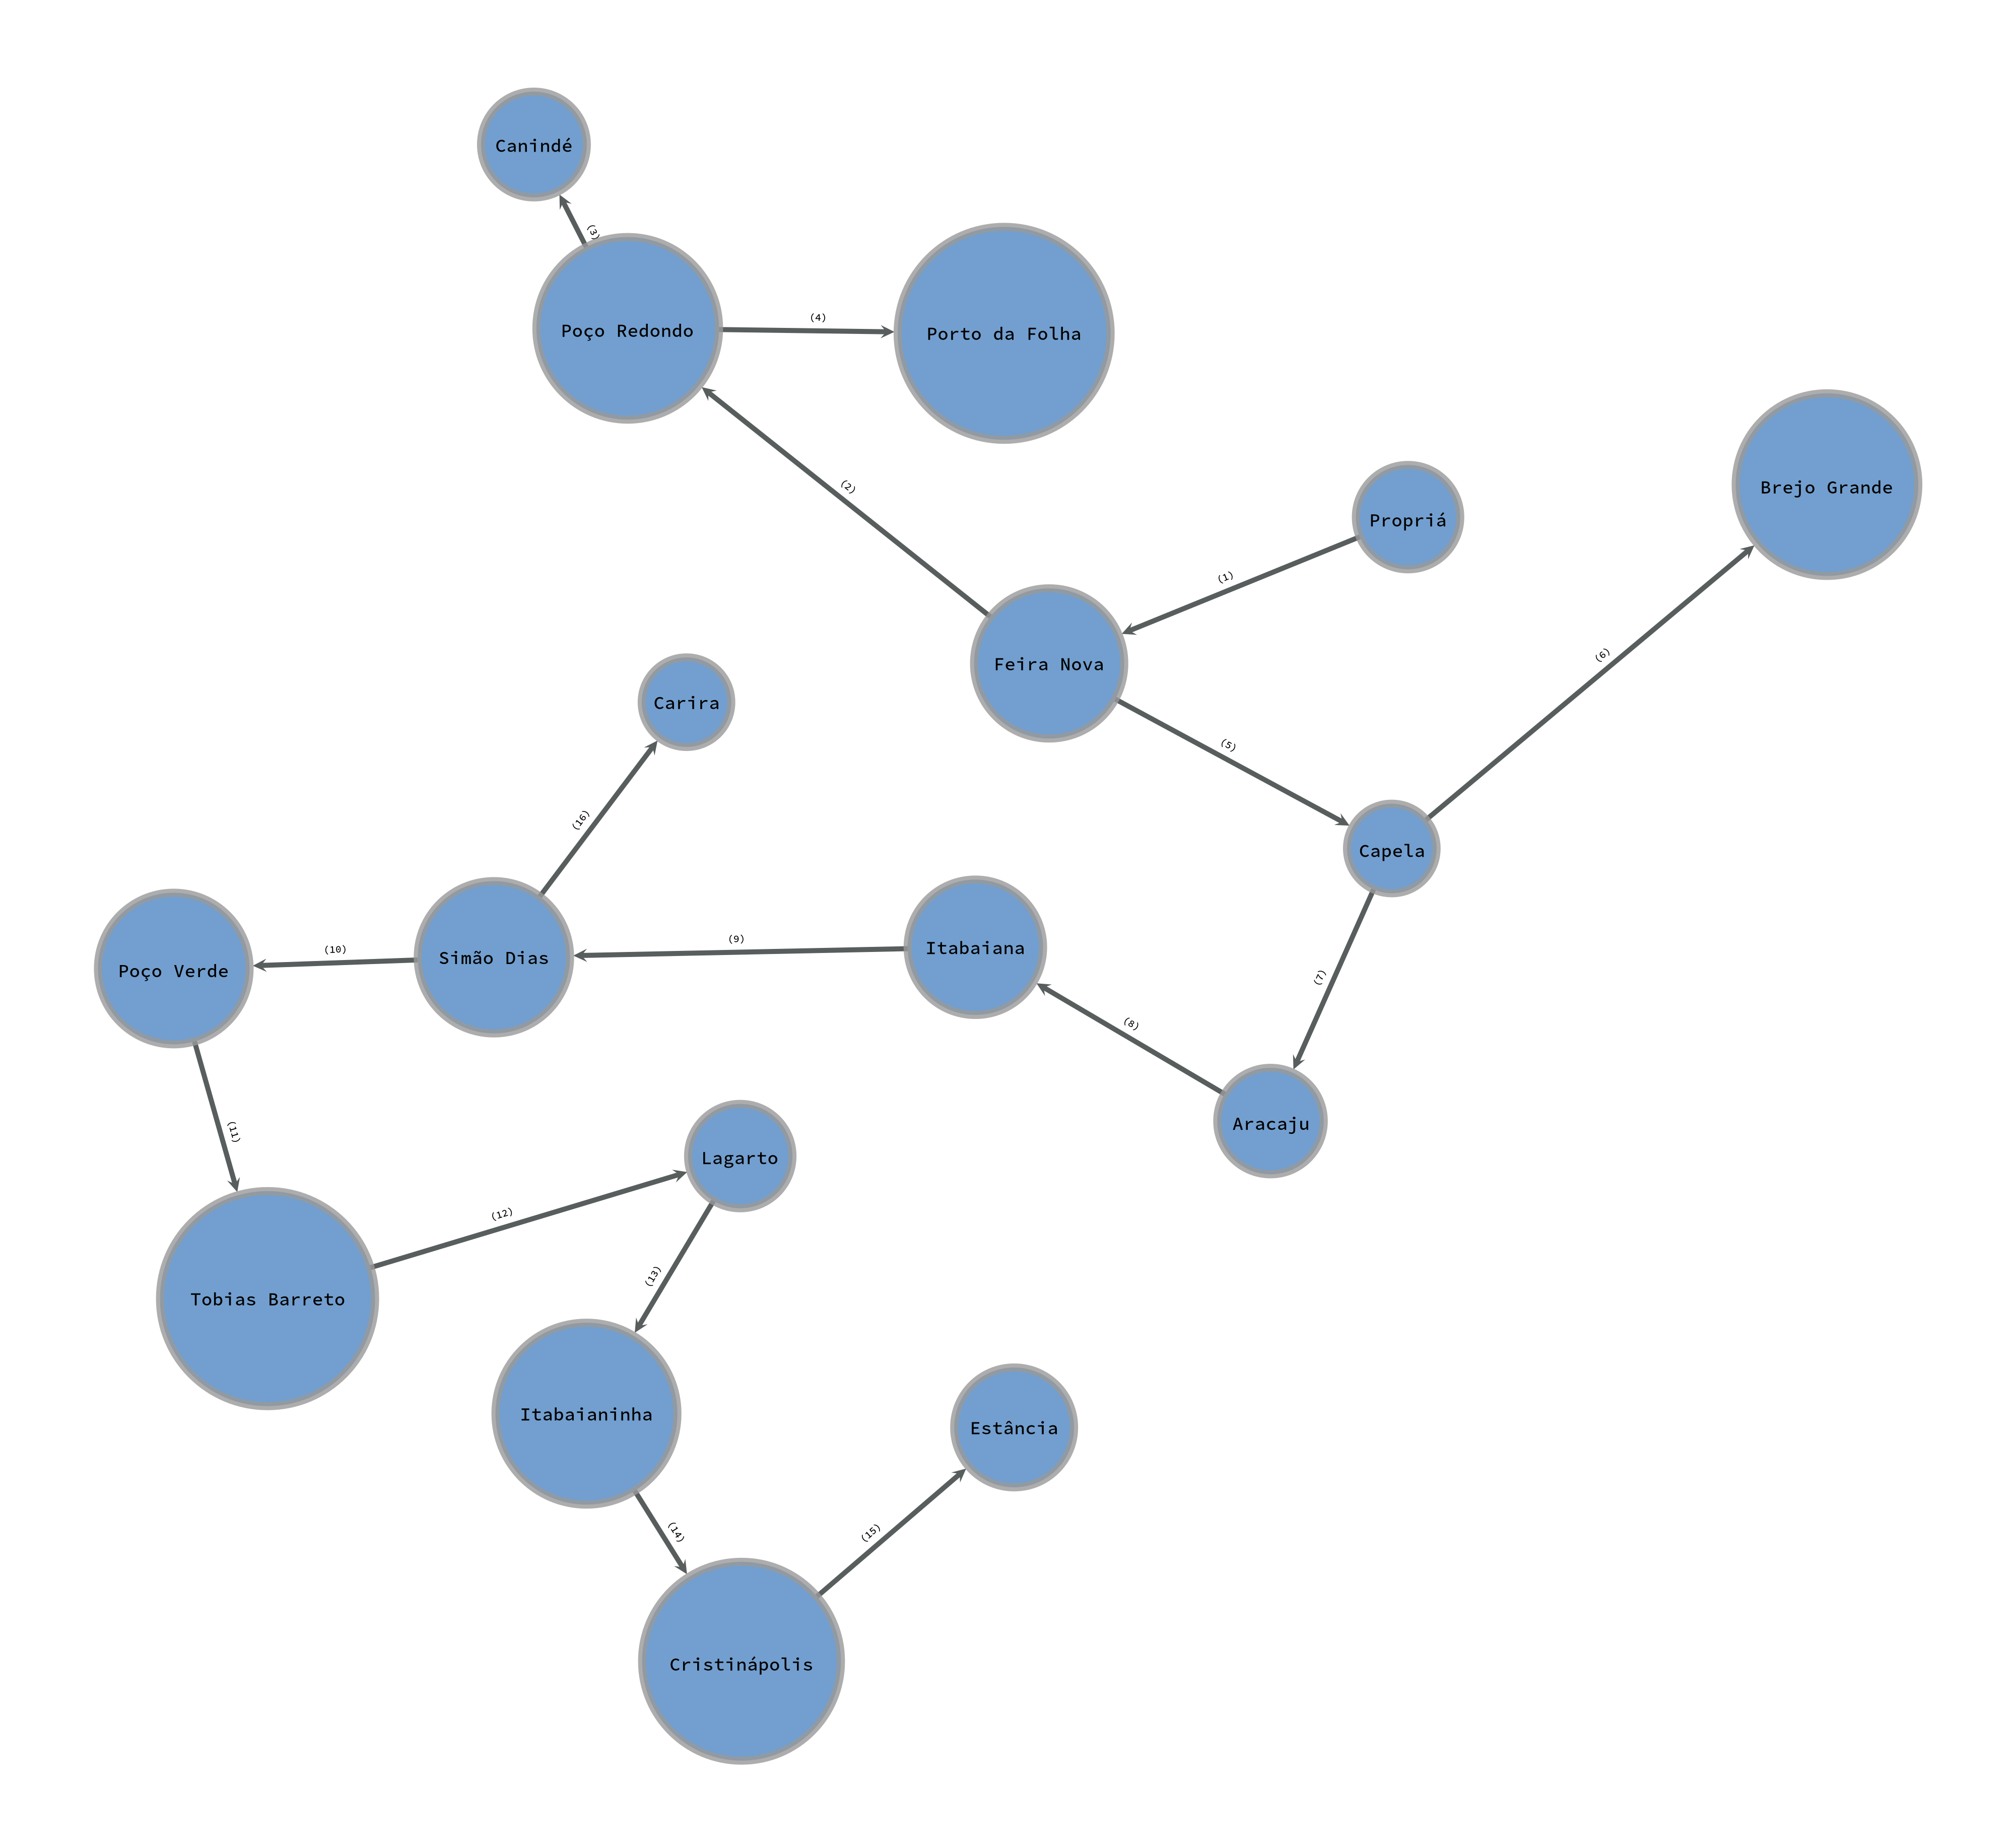

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f90e496f940, at 0x7f912436a440>

In [2]:
import graph_tool.all as gt                           # Biblioteca para GRAFO
g_dfs = gt.Graph()                                    # criação do objeto para busca em Profundidade
v_name_dfs = g_dfs.new_vertex_property("string")      # referenciação da lista v_name com uma nova propriedade (label) criada para o vértice - tipo string 
e_ord = g_dfs.new_edge_property("int")                # referenciação da lista e_ord com uma nova propriedade criada para a ordem de expansão - tipo int
e_action_dfs = g_dfs.new_edge_property("string")      # referenciação da lista e_ord com uma nova propriedade criada para a descrilção da ação relacionada a aresta - tipo string

#Criação dos vértices no grafo à partir do arquivo .jff do jFlap
xmldoc = minidom.parse("2022.1 - IA - Grafo.jff")         #Carregando arquivo do JFLAP
itemlist = xmldoc.getElementsByTagName('state')                # Tag <state>  
n_Vertex = len(itemlist)                              
print('Número de Vértices:', len(itemlist))                    # Total de Estados
for s in itemlist:
    v = g_dfs.add_vertex()
    v_name_dfs[v] = s.attributes['name'].value
# Lista de vértices criados
print(list(v_name))

#Busca em Profundidade (dfs) e geração das arestas
raiz = 'Propriá'
index_raiz = list(v_name).index(raiz)
ord = 1
for edge in gt.dfs_iterator(g, g.vertex(index_raiz)):
   print(v_name[int(edge.source())], "->", v_name[int(edge.target())])
   e = g_dfs.add_edge(int(edge.source()), int(edge.target()))
   e_ord[e] = ord
   e_action_dfs[e] = '(' + str(ord) + ') ' #+ e_action[g.edge(int(edge.source()), int(edge.target()))] 
   ord += 1

#Desenhando o grafo
gt.graph_draw(g_dfs, pos = v_pos,
               bg_color = "white",
               vertex_text= v_name_dfs,
               edge_text= e_action_dfs,
               edge_pen_width = 5,              
               vertex_font_size=18,
               edge_font_size = 10,
               #vertex_shape="double_circle",
               vertex_fill_color = "#729fcf",
               #fit_view = True,
               vertex_size = 80,
               output_size=(2000, 2000))               
               #output="2022.1 - IA - Árvore de Busca em Profundidade - Ordem de Expansão dos Nodos - Estudo.png")                        


**Busca em Profundidade - Busca e Apresentação do Caminho**

In [3]:
class VisitorExample(gt.DFSVisitor):                                            # É um objeto visitante que é chamado nos pontos de evento dentro do algoritmo dfs_search()
    def __init__(self, name, time, name_time, v_color, dist, pred, e_color, e_action, e_ord): 
        self.name = name
        self.time = time
        self.name_time = name_time
        self.fill_color = v_color
        self.dist = dist
        self.pred = pred
        self.color = e_color
        self.e_action = e_action
        self.e_ord = e_ord
        self.e_count = 0
        self.last_time = 0
        
    def discover_vertex(self, u):                                               # Invocado quando um vértice é encontrado pela primeira vez.
        self.name[u] = v_name[u]
        self.time[u] = self.last_time
        self.last_time += 1        
        self.name_time[u] = str(self.name[u]) + "(" + str(self.time[u]) + ")"
        print("-->", self.name[u], "foi encontrado e entrou na FILA") 
        self.fill_color[u] = "white"

    def examine_vertex(self, u):                                                # Invocado em um vértice à medida que é retirado da fila. 
        print(self.name[u], "saiu da FILA e está sendo analisado (expandido)...") 

    def tree_edge(self, e):                                                     # Invocado em cada aresta à medida que se torna um 
        self.pred[e.target()] = int(e.source())                                 # membro das arestas que formam a árvore de pesquisa.
        self.dist[e.target()] = self.dist[e.source()] + 1
        e = g_dfs.add_edge(int(e.source()), int(e.target()))
        self.color[e] = "gray"
        self.e_action[e] = e_action[g.edge(int(e.source()), int(e.target()))]
        self.e_count += 1
        self.e_ord[e] = self.e_count

    def finish_vertex(self, u):
        print("Todos os vértices adjacentes à", self.name[u], "foram descobertos!") 



------------------------------------------------
> Busca em Profundidade - Caminhamento pelos Estados
------------------------------------------------

--> Propriá foi encontrado e entrou na FILA
--> Feira Nova foi encontrado e entrou na FILA
--> Poço Redondo foi encontrado e entrou na FILA
--> Canindé foi encontrado e entrou na FILA
Todos os vértices adjacentes à Canindé foram descobertos!
--> Porto da Folha foi encontrado e entrou na FILA
Todos os vértices adjacentes à Porto da Folha foram descobertos!
Todos os vértices adjacentes à Poço Redondo foram descobertos!
--> Capela foi encontrado e entrou na FILA
--> Brejo Grande foi encontrado e entrou na FILA
Todos os vértices adjacentes à Brejo Grande foram descobertos!
--> Aracaju foi encontrado e entrou na FILA
--> Itabaiana foi encontrado e entrou na FILA
--> Simão Dias foi encontrado e entrou na FILA
--> Poço Verde foi encontrado e entrou na FILA
--> Tobias Barreto foi encontrado e entrou na FILA
--> Lagarto foi encontrado e entrou n

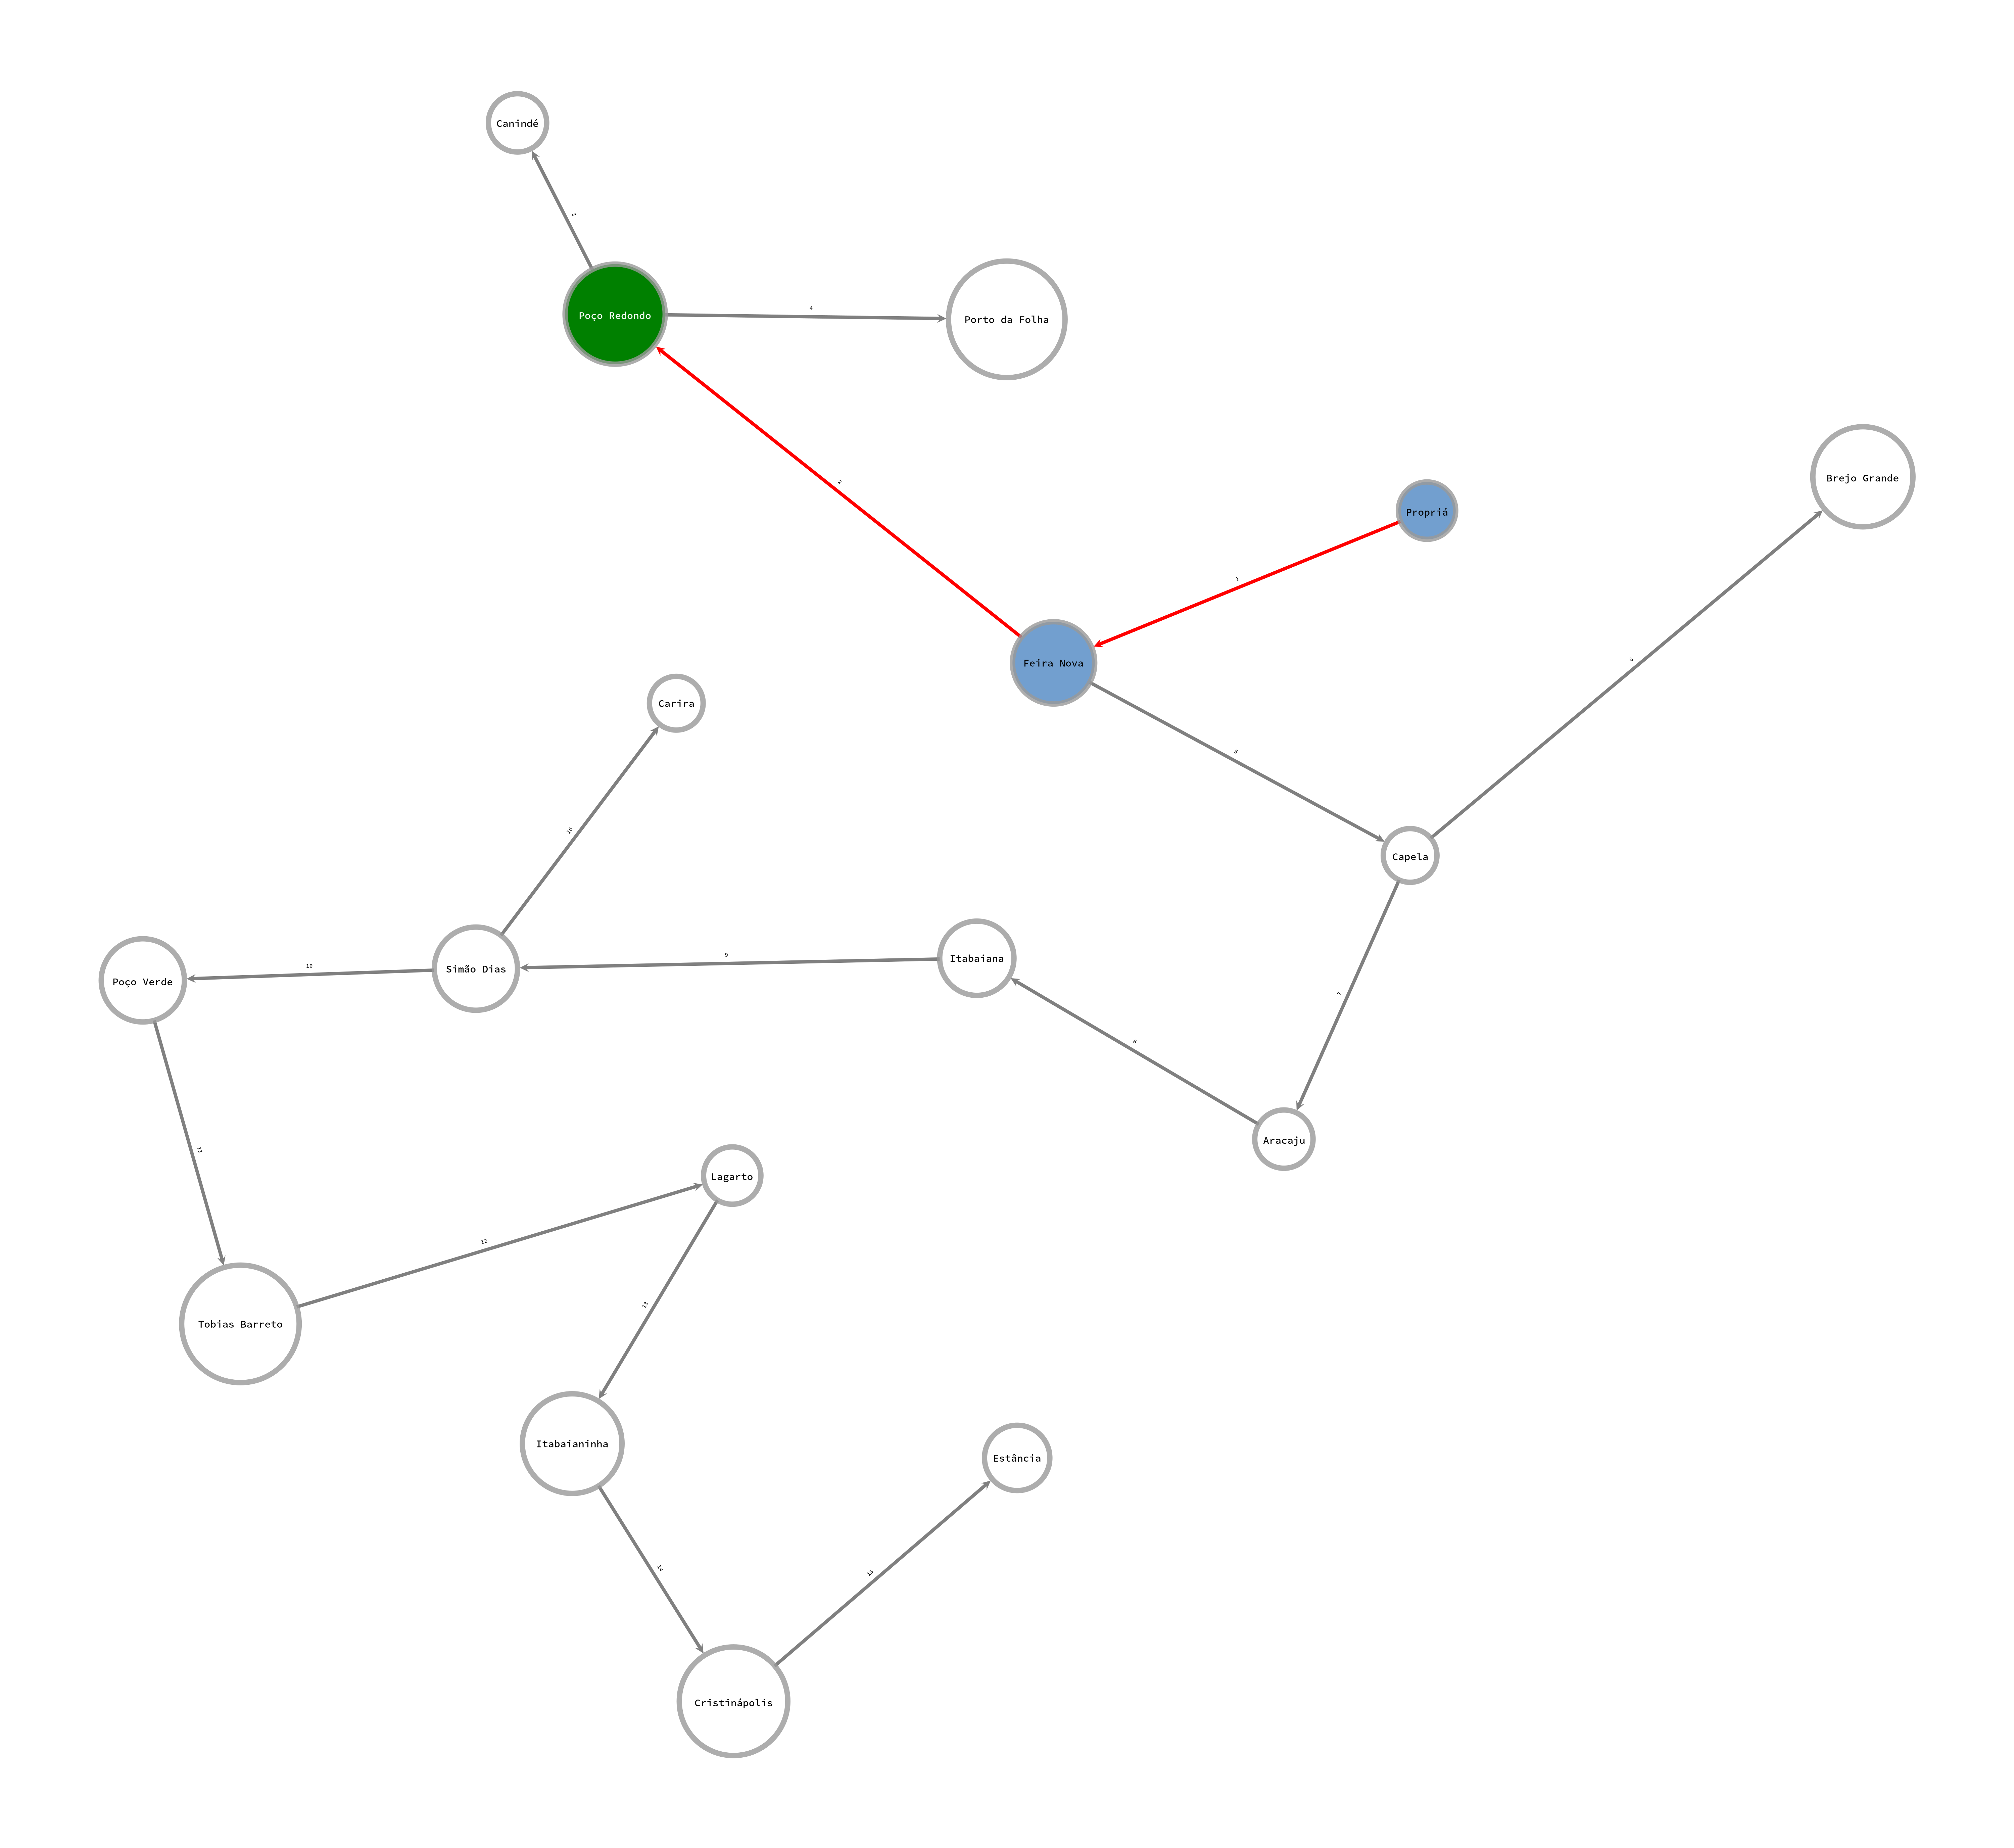

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f912433fcd0, at 0x7f912436a980>

In [4]:
#Busca em Profundidade (dfs) e geração das arestas
g_dfs = gt.Graph()                                      # criação do objeto para busca em Profundidade
dfsv_name       = g_dfs.new_vertex_property("string")      # referenciação da lista v_name_dfs com uma nova propriedade do vértice para o nome - tipo string 
dfsv_time       = g_dfs.new_vertex_property("int")         # referenciação da lista v_time com uma nova propriedade do vértice para a ordem de expansão - tipo int
dfsv_name_time  = g_dfs.new_vertex_property("string")      # referenciação da lista v_name_time com uma nova propriedade do vértice para o nome e ordem de expansão - tipo string
dfsv_color      = g_dfs.new_vertex_property("string")      # referenciação da lista v_color com uma nova propriedade do vértice para a cor - tipo string  
dfsv_dist       = g_dfs.new_vertex_property("int")         # referenciação da lista v_dist como uma propriedade do vértice criada para a distância da raiz
dfsv_pred       = g_dfs.new_vertex_property("int64_t")     # referenciação da lista v_pred como uma propriedade do vértice para referenciar o predecessor (pai)
dfse_color      = g_dfs.new_edge_property("string")        # referenciação da lista e_color com uma nova propriedade da aresta para a cor - tipo string  
dfse_action     = g_dfs.new_edge_property("string")        # referenciação da lista e_action_dfs com uma nova propriedade da aresta para a ação - tipo string
dfse_ord        = g_dfs.new_edge_property("string")        # referenciação da lista e_action_dfs com uma nova propriedade da aresta para a ação - tipo string

print("------------------------------------------------")
print("> Busca em Profundidade - Caminhamento pelos Estados")
print("------------------------------------------------\n")
raiz = 'Propriá'
alvo = 'Poço Redondo'
index_raiz = list(v_name).index(raiz)

gt.dfs_search(g, g.vertex(index_raiz), VisitorExample(dfsv_name, dfsv_time, dfsv_name_time, dfsv_color, dfsv_dist, dfsv_pred, dfse_color, dfse_action, dfse_ord))
print("\n> Informações relevantes:")
print("-------------------------\n")
print("Espaço de Estados......:", list(dfsv_name))
print("Ordem de Expansão......:", list(dfsv_time))
print("Estados e Ordem de Exp.:", list(dfsv_name_time))
print("Cores Vértices.........:", list(dfsv_color))
print("Distância da raiz......:", list(dfsv_dist))
print("Precedessores..........:", list(dfsv_pred))
print("Cores Arestas..........:", list(dfse_color))
print("Ações das Arestas......:", list(dfse_action))
print("Arestas e Ordem de Exp.:", list(dfse_ord))


print("\n> Procura de um Estado e Caminho:")
print("---------------------------------\n")

index_alvo = list(dfsv_name).index(alvo)                     # Localizando o índice do Estado a ser encontrado
dfsv_color[index_raiz] = "#729fcf"
dfsv_color[index_alvo] = "green"
path = []                                                    # array do caminho
path.insert(0,dfsv_name[index_alvo])                         # inserções sendo realizadas no início

while index_alvo != index_raiz:
  e = g_dfs.edge(dfsv_pred[index_alvo], index_alvo)
  dfse_color[e] = "red"
  index_alvo = dfsv_pred[index_alvo]
  path.insert(0,dfsv_name[index_alvo])
  dfsv_color[index_alvo] = "#729fcf"
  
dfsv_color[index_raiz] = "#729fcf"; print("Cores Vértices.........:", list(dfsv_color))

print("Caminho encontrado.....:",path)                   # mostrando o caminho encontrado da raiz ao alvo


#Desenhando o grafo
gt.graph_draw(g_dfs, pos = v_pos,#pos=gt.arf_layout(g_dfs),
               bg_color = "white",
               vertex_text= dfsv_name,
               edge_text= dfse_ord, #dfse_action,
               edge_color= dfse_color,
               edge_pen_width = 5,              
               vertex_fill_color=dfsv_color,              
               vertex_font_size=15,
               edge_font_size = 8,
               #vertex_shape="double_circle",
               #vertex_fill_color="#729fcf",
               vertex_size = 80,
               output_size=(3000, 3000))
               #output="2022.1 - IA - Árvore de Busca em Profundidade - Busca e Apresentação do Caminho.png")       